# Subjective
WomenTechWomenYes (WTWY) has an annual gala at the beginning of the summer each year. As we are new and inclusive organization, we try to do double duty with the gala both to fill our event space with individuals passionate about increasing the participation of women in technology, and to concurrently build awareness and reach.

In [1]:
#setup import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# this statement allows the visuals to render within your Jupyter Notebook, instead of a pop window
%matplotlib inline 

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 3)

In [2]:
cur_files = [
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190622.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt",
]

In [3]:
data_list = []

for cur_file in cur_files:
    print(".")
    data_list.append(pd.read_csv(cur_file))
    
df = pd.concat(data_list)
df.rename(columns=lambda x: x.strip(), inplace=True)

.
.
.
.
.
.
.
.
.


In [4]:
DF_19021 = df

In [5]:
DF_19021.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [6]:
# Remove whitesapce for the columns name 
DF_19021.rename(columns=lambda x: x.strip(), inplace=True)

DF_19021.sort_values(["STATION","SCP","DATE","TIME"], inplace=True)


#Calculate ENTRIES and EXITS DIfference to get passenger number entering/exiting turnstile
DF_19021['ENTRIES_DIFF'] = DF_19021.groupby(["STATION", "SCP"])['ENTRIES'].diff()
DF_19021['EXITS_DIFF'] = DF_19021.groupby(["STATION", "SCP"])['EXITS'].diff()


In [7]:
# (DF_19021.groupby()
#          .diff()
#         .sort_values()
#      .rest_index())

In [8]:
DF_19021.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF
31049,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,00:00:00,REGULAR,14647394,16373694,NaN,NaN
31050,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,04:00:00,REGULAR,14647394,16373709,0.0,15.0
31051,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,08:00:00,REGULAR,14647395,16373732,1.0,23.0
31052,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,12:00:00,REGULAR,14647395,16373766,0.0,34.0
31053,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,16:00:00,REGULAR,14647395,16373800,0.0,34.0
31054,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,20:00:00,REGULAR,14647395,16373826,0.0,26.0
31055,H007,R248,00-00-00,1 AV,L,BMT,04/28/2019,00:00:00,REGULAR,14647395,16373849,0.0,23.0
31056,H007,R248,00-00-00,1 AV,L,BMT,04/28/2019,04:00:00,REGULAR,14647395,16373865,0.0,16.0
31057,H007,R248,00-00-00,1 AV,L,BMT,04/28/2019,08:00:00,REGULAR,14647395,16373883,0.0,18.0
31058,H007,R248,00-00-00,1 AV,L,BMT,04/28/2019,12:00:00,REGULAR,14647395,16373909,0.0,26.0


In [145]:
print (DF_19021.TIME.unique().count())
# DF_19021.TIME.value_counts().plot('barh')[0:10]


AttributeError: 'numpy.ndarray' object has no attribute 'count'

<BarContainer object of 100 artists>

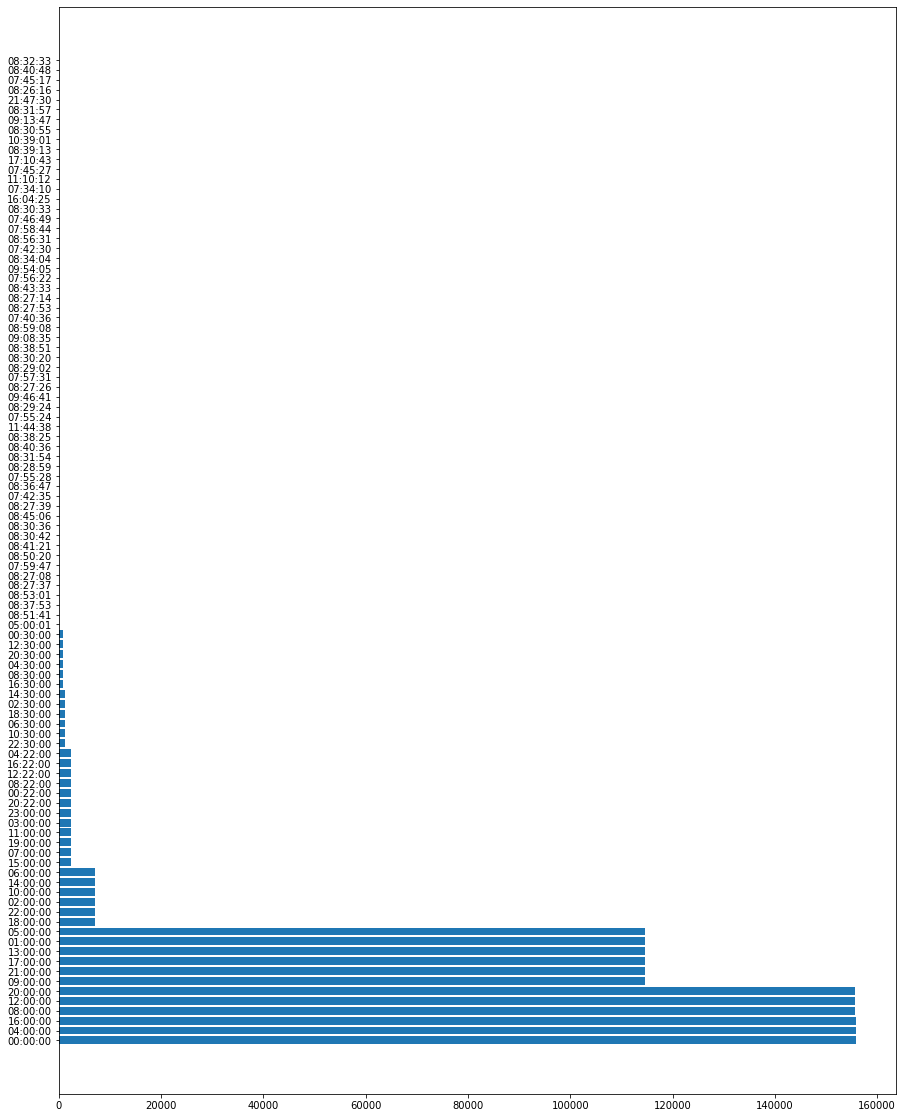

In [10]:
#pick first 100 to have a feeling which time frames have the most data collection
Y = DF_19021.TIME.value_counts()[0:100]
X = Y.index[0:100]
plt.figure(figsize = [15,20])
plt.barh(X,Y)
# Y.count()
# plt.hist(DF_19021.TIME)
# plt.hist(Y)

In [138]:
#plt.plot(DF_19021[DF_19021.STATION=='110 ST'].TIME)

In [12]:
DF_19021.describe()

,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF
count,1.850e+06,1.850e+06,1.846e+06,1.846e+06
mean,4.176e+07,3.417e+07,2.508e+03,7.398e+02
std,2.125e+08,1.956e+08,1.680e+08,1.542e+08
min,0.000e+00,0.000e+00,-2.128e+09,-2.062e+09
25%,3.266e+05,1.302e+05,1.000e+00,1.000e+00
50%,2.156e+06,1.233e+06,6.200e+01,4.600e+01
75%,6.779e+06,4.599e+06,2.900e+02,2.080e+02
max,2.129e+09,2.124e+09,2.128e+09,2.062e+09


In [13]:
#calculate ratio of outlier Data 
x =DF_19021.count()
y = DF_19021[(DF_19021.EXITS_DIFF < 0) | (DF_19021.ENTRIES_DIFF < 0)].count()
x / y

C/A             7.741
UNIT            7.741
SCP             7.741
STATION         7.741
LINENAME        7.741
DIVISION        7.741
DATE            7.741
TIME            7.741
DESC            7.741
ENTRIES         7.741
EXITS           7.741
ENTRIES_DIFF    7.723
EXITS_DIFF      7.723
dtype: float64

In [14]:
#Clean data, remove negative number and numbers larger than 40000
DF_cleaned = DF_19021[(DF_19021.EXITS_DIFF >= 0) & (DF_19021.ENTRIES_DIFF >= 0)]
DF_cleaned = DF_cleaned[(DF_cleaned.EXITS_DIFF <= 4e4) & (DF_cleaned.ENTRIES_DIFF <= 4e4)]


In [15]:
# Create new Colum for (Entries_DIFF + EXITS_DIFF)
DF_cleaned['Total_flows'] = DF_cleaned.ENTRIES_DIFF+ DF_cleaned.EXITS_DIFF
DF_cleaned.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF,Total_flows
31050,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,04:00:00,REGULAR,14647394,16373709,0.0,15.0,15.0
31051,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,08:00:00,REGULAR,14647395,16373732,1.0,23.0,24.0
31052,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,12:00:00,REGULAR,14647395,16373766,0.0,34.0,34.0
31053,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,16:00:00,REGULAR,14647395,16373800,0.0,34.0,34.0
31054,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,20:00:00,REGULAR,14647395,16373826,0.0,26.0,26.0


In [16]:
DF_19021.count()

C/A             1850169
UNIT            1850169
SCP             1850169
STATION         1850169
LINENAME        1850169
DIVISION        1850169
DATE            1850169
TIME            1850169
DESC            1850169
ENTRIES         1850169
EXITS           1850169
ENTRIES_DIFF    1845843
EXITS_DIFF      1845843
dtype: int64

In [17]:
DF_cleaned.count()

C/A             1459493
UNIT            1459493
SCP             1459493
STATION         1459493
LINENAME        1459493
DIVISION        1459493
DATE            1459493
TIME            1459493
DESC            1459493
ENTRIES         1459493
EXITS           1459493
ENTRIES_DIFF    1459493
EXITS_DIFF      1459493
Total_flows     1459493
dtype: int64

In [18]:
#DF_cleaned[DF_cleaned.STATION == '1 AV'].groupby(['STATION','DATE','TIME']).sum()


## Dates and Time and Time Bining

In [19]:
# Convert Date to day of week 
DF_cleaned['DATE'] = pd.to_datetime(DF_cleaned['DATE'])
DF_cleaned['day_of_week'] = DF_cleaned['DATE'].dt.day_name()

DF_cleaned.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF,Total_flows,day_of_week
31050,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,04:00:00,REGULAR,14647394,16373709,0.0,15.0,15.0,Saturday
31051,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,08:00:00,REGULAR,14647395,16373732,1.0,23.0,24.0,Saturday
31052,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,12:00:00,REGULAR,14647395,16373766,0.0,34.0,34.0,Saturday
31053,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,16:00:00,REGULAR,14647395,16373800,0.0,34.0,34.0,Saturday
31054,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,20:00:00,REGULAR,14647395,16373826,0.0,26.0,26.0,Saturday


In [20]:
# Seperate weekdays and weekend DF
def IsWeekday(string):
    weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
    if string in weekday:
        return "True"
    else:
        return "False"

DF_cleaned['Weekday'] = DF_cleaned.day_of_week.apply(lambda x: IsWeekday(x))


In [21]:
# Sorting various time into 0, 4, 8, 12, 16, 20 hours catergory 
def BIN_time(string):
    import datetime as DT
    cur_hour = DT.datetime.strptime(string, '%H:%M:%S').hour
    
    if cur_hour < 2:
      cur_hour = 0
    elif cur_hour < 6:
      cur_hour = 4
    elif cur_hour < 10:
      cur_hour = 8
    elif cur_hour < 14:
      cur_hour = 12
    elif cur_hour < 18:
      cur_hour = 16
    elif cur_hour < 22:
      cur_hour = 20
    else:
      assert cur_hour < 24
      cur_hour = 0
    return cur_hour

# NEW_TIME 
DF_cleaned['NEW_TIME'] = DF_cleaned.TIME.apply(lambda x: BIN_time(x))


In [22]:
#double check
DF_cleaned.NEW_TIME.unique()

array([ 4,  8, 12, 16, 20,  0])

In [23]:
DF_cleaned.NEW_TIME.value_counts()

8     256024
12    244966
16    241908
20    240963
4     239508
0     236124
Name: NEW_TIME, dtype: int64

In [24]:
# pick NEW_TIME 12 and 20  (targeting commute time. TimeFrame is 4 hours prior)
DF_cleaned[( DF_cleaned.NEW_TIME == 12 ) | ( DF_cleaned.NEW_TIME == 20 )]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF,Total_flows,day_of_week,Weekday,NEW_TIME
31052,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,12:00:00,REGULAR,14647395,16373766,0.0,34.0,34.0,Saturday,False,12
31054,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,20:00:00,REGULAR,14647395,16373826,0.0,26.0,26.0,Saturday,False,20
31058,H007,R248,00-00-00,1 AV,L,BMT,2019-04-28,12:00:00,REGULAR,14647395,16373909,0.0,26.0,26.0,Sunday,False,12
31060,H007,R248,00-00-00,1 AV,L,BMT,2019-04-28,20:00:00,REGULAR,14647395,16373964,0.0,28.0,28.0,Sunday,False,20
31065,H007,R248,00-00-00,1 AV,L,BMT,2019-04-29,12:00:00,REGULAR,14648785,16375867,873.0,832.0,1705.0,Monday,True,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181194,R419,R326,00-05-01,ZEREGA AV,6,IRT,2019-06-26,21:00:00,REGULAR,39,151,0.0,0.0,0.0,Wednesday,True,20
181198,R419,R326,00-05-01,ZEREGA AV,6,IRT,2019-06-27,13:00:00,REGULAR,39,151,0.0,0.0,0.0,Thursday,True,12
181200,R419,R326,00-05-01,ZEREGA AV,6,IRT,2019-06-27,21:00:00,REGULAR,39,151,0.0,0.0,0.0,Thursday,True,20
181204,R419,R326,00-05-01,ZEREGA AV,6,IRT,2019-06-28,13:00:00,REGULAR,39,151,0.0,0.0,0.0,Friday,True,12


In [25]:

DF_weekdays = DF_cleaned[DF_cleaned.Weekday == "True"]
DF_weekend = DF_cleaned[DF_cleaned.Weekday == "False"]


# narrow down to top 25
TOP_25_DF_weekend = DF_weekend.groupby(['STATION']).sum().sort_values('Total_flows', ascending=False).reset_index().iloc[0:26]
TOP_25_DF_weekedays = DF_weekdays.groupby(['STATION']).sum().sort_values('Total_flows', ascending=False).reset_index().iloc[0:26]


TOP_25_DF_weekedays['Daily_Avg'] = TOP_25_DF_weekedays.Total_flows/45

TOP_25_DF_weekedays['Entries_Daily_Avg'] = TOP_25_DF_weekedays.ENTRIES_DIFF/45
TOP_25_DF_weekedays['Exits_Daily_Avg'] = TOP_25_DF_weekedays.EXITS_DIFF/45

TOP_25_DF_weekend['Daily_Avg'] = TOP_25_DF_weekend.Total_flows/18

TOP_25_DF_weekend['Entries_Daily_Avg'] = TOP_25_DF_weekend.ENTRIES_DIFF/18
TOP_25_DF_weekend['Exits_Daily_Avg'] = TOP_25_DF_weekend.EXITS_DIFF/18

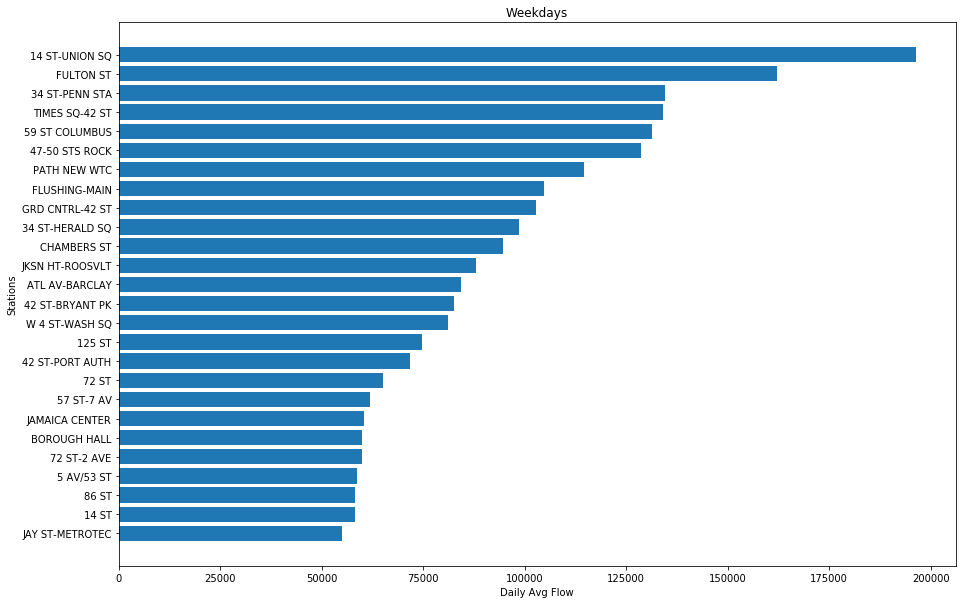

In [57]:
# plot
plt.figure(figsize = [15,10])
plt.barh(TOP_25_DF_weekedays.STATION,TOP_25_DF_weekedays.Daily_Avg ); #horizontal bar chart
plt.gca().invert_yaxis()
plt.title("Weekdays")
plt.xlabel('Daily Avg Flow')
plt.ylabel('Stations')
plt.savefig('Weekdays_Daily_Flow.png')

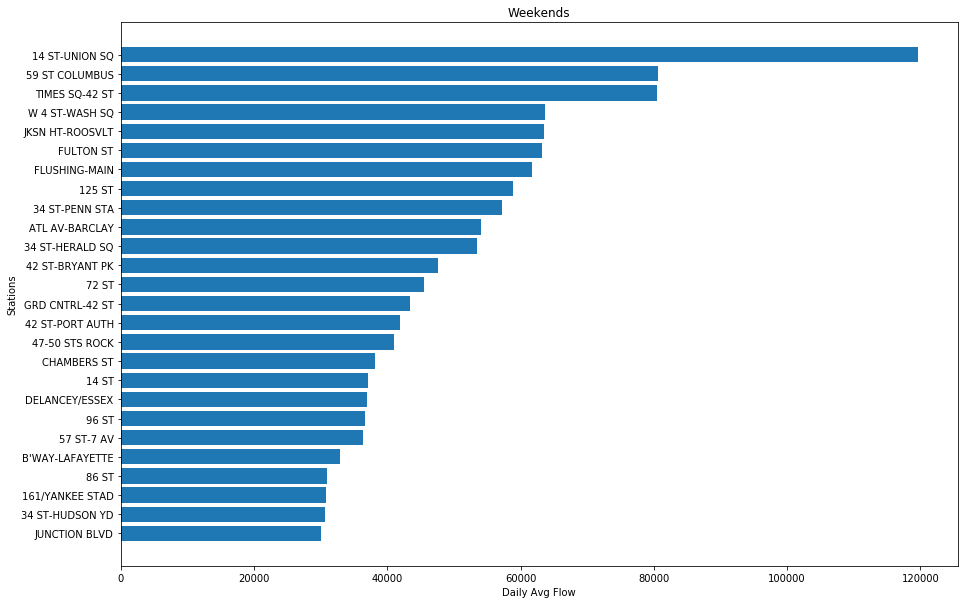

In [58]:

# plot
plt.figure(figsize = [15,10])
plt.barh(TOP_25_DF_weekend.STATION,TOP_25_DF_weekend.Daily_Avg ); #horizontal bar chart
plt.gca().invert_yaxis()
plt.title("Weekends")
plt.xlabel('Daily Avg Flow')
plt.ylabel('Stations')
plt.savefig('Weekends_Daily_Flow.png')

In [28]:
#Break into morning and night commute dataset
DF_morning = DF_weekdays[DF_weekdays.NEW_TIME == 12]
DF_night = DF_weekdays[DF_weekdays.NEW_TIME == 20]


# narrow down to top 25
TOP_25_DF_morning = DF_morning.groupby(['STATION']).sum().sort_values('EXITS_DIFF', ascending=False).reset_index().iloc[0:26]
TOP_25_DF_night = DF_night.groupby(['STATION']).sum().sort_values('ENTRIES_DIFF', ascending=False).reset_index().iloc[0:26]


TOP_25_DF_night['Daily_Avg'] = TOP_25_DF_night.Total_flows/45

TOP_25_DF_night['Entries_Daily_Avg'] = TOP_25_DF_night.ENTRIES_DIFF/45
TOP_25_DF_night['Exits_Daily_Avg'] = TOP_25_DF_night.EXITS_DIFF/45

TOP_25_DF_morning['Daily_Avg'] = TOP_25_DF_morning.Total_flows/18

TOP_25_DF_morning['Entries_Daily_Avg'] = TOP_25_DF_morning.ENTRIES_DIFF/18
TOP_25_DF_morning['Exits_Daily_Avg'] = TOP_25_DF_morning.EXITS_DIFF/18


TOP_25_DF_morning['Flow_Ratio'] = TOP_25_DF_morning.ENTRIES_DIFF/TOP_25_DF_morning.EXITS_DIFF

TOP_25_DF_morning['Flow_Ratio']=TOP_25_DF_morning['Flow_Ratio'].replace(0, np.nan)
TOP_25_DF_morning['Flow_Ratio']=TOP_25_DF_morning['Flow_Ratio'].replace(np.inf, np.nan)
TOP_25_DF_morning['Flow_Ratio'] = TOP_25_DF_morning['Flow_Ratio'].fillna(value=1)


TOP_25_DF_night['Flow_Ratio'] = TOP_25_DF_night.ENTRIES_DIFF/TOP_25_DF_night.EXITS_DIFF

TOP_25_DF_night['Flow_Ratio']=TOP_25_DF_night['Flow_Ratio'].replace(0, np.nan)
TOP_25_DF_night['Flow_Ratio']=TOP_25_DF_night['Flow_Ratio'].replace(np.inf, np.nan)
TOP_25_DF_night['Flow_Ratio'] = TOP_25_DF_night['Flow_Ratio'].fillna(value=1)


In [29]:
TOP_25_DF_night.describe()

,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF,Total_flows,NEW_TIME,Daily_Avg,Entries_Daily_Avg,Exits_Daily_Avg,Flow_Ratio
count,2.600e+01,2.600e+01,2.600e+01,2.600e+01,2.600e+01,26.000,26.000,26.000,26.000,26.000
mean,5.278e+10,4.386e+10,8.850e+05,4.113e+05,1.296e+06,26717.692,28805.811,19666.841,9138.970,2.770
std,5.132e+10,5.158e+10,4.268e+05,2.844e+05,5.762e+05,11371.534,12803.981,9485.276,6319.521,1.383
min,1.486e+08,1.664e+08,4.878e+05,9.462e+04,6.134e+05,11700.000,13631.778,10841.044,2102.556,0.592
25%,5.757e+09,4.648e+09,5.246e+05,2.328e+05,8.228e+05,18285.000,18283.961,11657.556,5173.322,1.932
50%,3.736e+10,1.511e+10,6.480e+05,3.053e+05,1.204e+06,24010.000,26744.833,14399.889,6783.722,2.716
75%,8.310e+10,8.313e+10,1.230e+06,5.219e+05,1.689e+06,35090.000,37542.322,27332.267,11597.711,3.597
max,1.526e+11,1.724e+11,1.705e+06,1.241e+06,2.688e+06,60900.000,59739.400,37896.178,27567.267,5.483


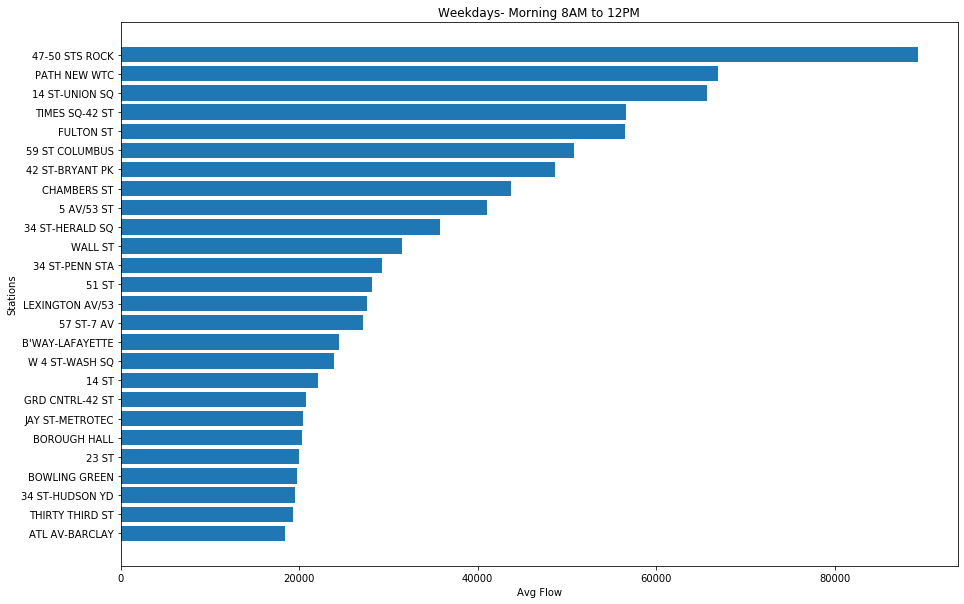

In [59]:
# plot
plt.figure(figsize = [15,10])
plt.barh(TOP_25_DF_morning.STATION,TOP_25_DF_morning.Exits_Daily_Avg ); #horizontal bar chart
plt.gca().invert_yaxis()
plt.title('Weekdays- Morning 8AM to 12PM')
plt.xlabel('Avg Flow')
plt.ylabel('Stations')
plt.savefig('Weekdays- Morning 8AM to 12PM')

Text(0, 0.5, 'Stations')

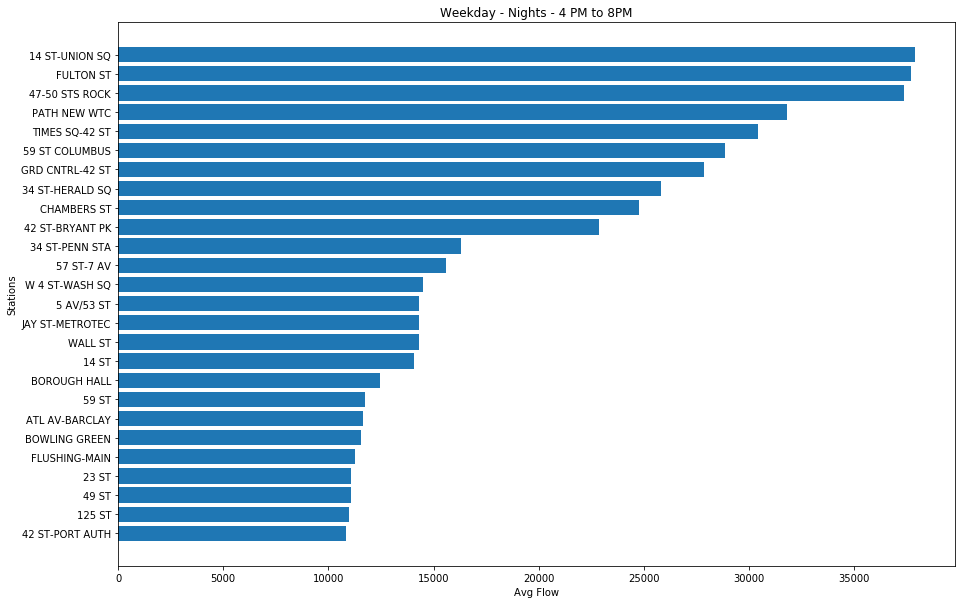

In [38]:
#  plot
plt.figure(figsize = [15,10])
plt.barh(TOP_25_DF_night.STATION,TOP_25_DF_night.Entries_Daily_Avg ); #horizontal bar chart
plt.gca().invert_yaxis()
plt.title("Weekday - Nights - 4 PM to 8PM")
plt.xlabel('Avg Flow')
plt.ylabel('Stations')
plt.savefig('Weekday - Nights - 4 PM to 8PM')

In [137]:
# TOP_25_DF_morning.STATION
# TOP_25_DF_night.STATION

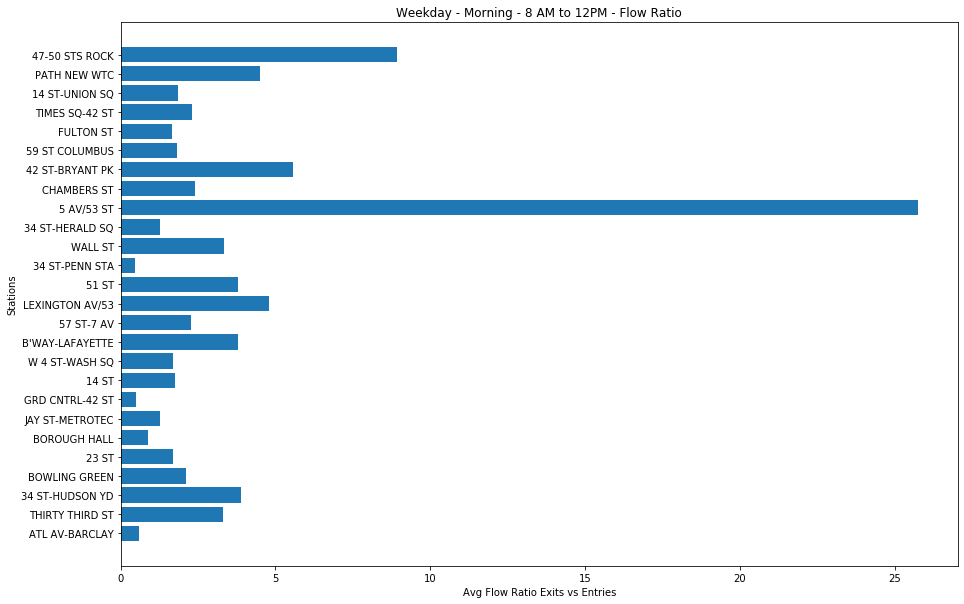

In [60]:
# plot
plt.figure(figsize = [15,10])
plt.barh(TOP_25_DF_morning.STATION,1/TOP_25_DF_morning.Flow_Ratio ); #horizontal bar chart
plt.gca().invert_yaxis()
plt.title("Weekday - Morning - 8 AM to 12PM - Flow Ratio")
plt.xlabel('Avg Flow Ratio Exits vs Entries')
plt.ylabel('Stations')
plt.savefig('Weekday - Morning - 8 AM to 12PM - Flow Ratio_appendix')

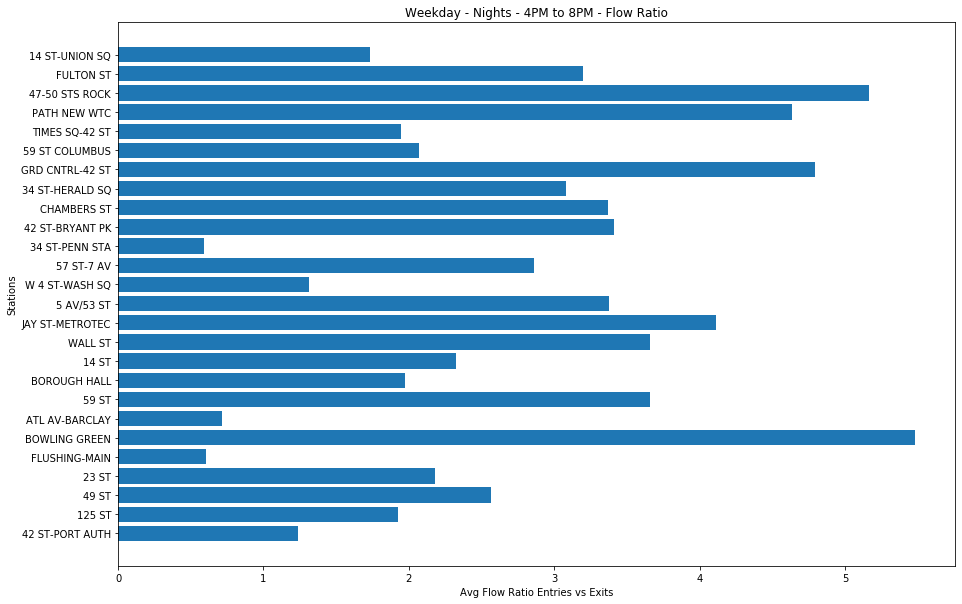

In [61]:
# plot
plt.figure(figsize = [15,10])
plt.barh(TOP_25_DF_night.STATION,TOP_25_DF_night.Flow_Ratio ); #horizontal bar chart
plt.gca().invert_yaxis()
plt.title("Weekday - Nights - 4PM to 8PM - Flow Ratio")
plt.xlabel('Avg Flow Ratio Entries vs Exits')
plt.ylabel('Stations')

plt.savefig("Weekday - Nights - 4PM to 8PM - Flow Ratio_appendix")

In [51]:
# TOP_Stations = TOP_25_DF_morning.STATION

In [52]:
# Top_Sations = (list(TOP_Stations))

In [133]:
# DF_cleaned[DF_cleaned.STATION == TOP_Stations[0]].LINENAME

In [134]:
# df_station = TOP_25_DF_morning.STATION
# df_station = pd.concat(TOP_25_DF_night.STATION)



In [ ]:
# DF_cleaned = DF_cleaned[(DF_cleaned.EXITS_DIFF <= 4e4) & (DF_cleaned.ENTRIES_DIFF <= 4e4)]
# DF_morning = DF_weekdays[DF_weekdays.NEW_TIME == 12]
# DF_night = DF_weekdays[DF_weekdays.NEW_TIME == 20]

In [90]:
#DataFrame for station we narrow down
DF_STATION_morning = DF_morning[( DF_morning.STATION == "14 ST" ) | ( DF_morning.STATION == "14 ST-UNION SQ" ) | ( DF_morning.STATION == "23 ST" ) | ( DF_morning.STATION == "34 ST-HERALD SQ" ) | ( DF_morning.STATION == "34 ST-HUDSON YD" ) | ( DF_morning.STATION == "34 ST-PENN STA" ) | ( DF_morning.STATION == "42 ST-BRYANT PK" ) | ( DF_morning.STATION == "42 ST-PORT AUTH" ) | ( DF_morning.STATION == "47-50 STS ROCK" ) | ( DF_morning.STATION == "49 ST" ) | ( DF_morning.STATION == "5 AV/53 ST" ) | ( DF_morning.STATION == "51 ST" ) | ( DF_morning.STATION == "57 ST-7 AV" ) | ( DF_morning.STATION == "59 ST COLUMBUS" ) | ( DF_morning.STATION == "B'WAY-LAFAYETTE" ) | ( DF_morning.STATION == "BOWLING GREEN" ) | ( DF_morning.STATION == "CHAMBERS ST" ) | ( DF_morning.STATION == "FLUSHING-MAIN" ) | ( DF_morning.STATION == "FULTON ST" ) | ( DF_morning.STATION == "GRD CNTRL-42 ST" ) | ( DF_morning.STATION == "LEXINGTON AV/53" ) | ( DF_morning.STATION == "PATH NEW WTC" ) | ( DF_morning.STATION == "THIRTY THIRD ST" ) | ( DF_morning.STATION == "TIMES SQ-42 ST" ) | ( DF_morning.STATION == "W 4 ST-WASH SQ" ) | ( DF_morning.STATION == "WALL ST" )]

DF_STATION_night = DF_night[( DF_night.STATION == "14 ST" ) | ( DF_night.STATION == "14 ST-UNION SQ" ) | ( DF_night.STATION == "23 ST" ) | ( DF_night.STATION == "34 ST-HERALD SQ" ) | ( DF_night.STATION == "34 ST-HUDSON YD" ) | ( DF_night.STATION == "34 ST-PENN STA" ) | ( DF_night.STATION == "42 ST-BRYANT PK" ) | ( DF_night.STATION == "42 ST-PORT AUTH" ) | ( DF_night.STATION == "47-50 STS ROCK" ) | ( DF_night.STATION == "49 ST" ) | ( DF_night.STATION == "5 AV/53 ST" ) | ( DF_night.STATION == "51 ST" ) | ( DF_night.STATION == "57 ST-7 AV" ) | ( DF_night.STATION == "59 ST COLUMBUS" ) | ( DF_night.STATION == "B'WAY-LAFAYETTE" ) | ( DF_night.STATION == "BOWLING GREEN" ) | ( DF_night.STATION == "CHAMBERS ST" ) | ( DF_night.STATION == "FLUSHING-MAIN" ) | ( DF_night.STATION == "FULTON ST" ) | ( DF_night.STATION == "GRD CNTRL-42 ST" ) | ( DF_night.STATION == "LEXINGTON AV/53" ) | ( DF_night.STATION == "PATH NEW WTC" ) | ( DF_night.STATION == "THIRTY THIRD ST" ) | ( DF_night.STATION == "TIMES SQ-42 ST" ) | ( DF_night.STATION == "W 4 ST-WASH SQ" ) | ( DF_night.STATION == "WALL ST" )]

In [103]:
DF_STATION_night.STATION.unique()

array(['14 ST', '14 ST-UNION SQ', '23 ST', '34 ST-HERALD SQ',
       '34 ST-HUDSON YD', '34 ST-PENN STA', '42 ST-BRYANT PK',
       '42 ST-PORT AUTH', '47-50 STS ROCK', '49 ST', '5 AV/53 ST',
       '51 ST', '57 ST-7 AV', '59 ST COLUMBUS', "B'WAY-LAFAYETTE",
       'BOWLING GREEN', 'CHAMBERS ST', 'FLUSHING-MAIN', 'FULTON ST',
       'GRD CNTRL-42 ST', 'LEXINGTON AV/53', 'PATH NEW WTC',
       'THIRTY THIRD ST', 'TIMES SQ-42 ST', 'W 4 ST-WASH SQ', 'WALL ST'],
      dtype=object)

In [139]:


DF_STATION_morning_flows = DF_STATION_morning.groupby(['STATION']).sum().Total_flows/45
DF_STATION_night_flows = DF_STATION_night.groupby(['STATION']).sum().sort_values('Total_flows', ascending=False).Total_flows/45

# DF_STATION_night_flows


In [100]:
# print(DF_STATION_morning.groupby(['STATION']), DF_STATION_morning_flows.shape)

<pandas.core.groupby.generic.DataFrameGroupBy object at 0x1915fc2d0> (26,)


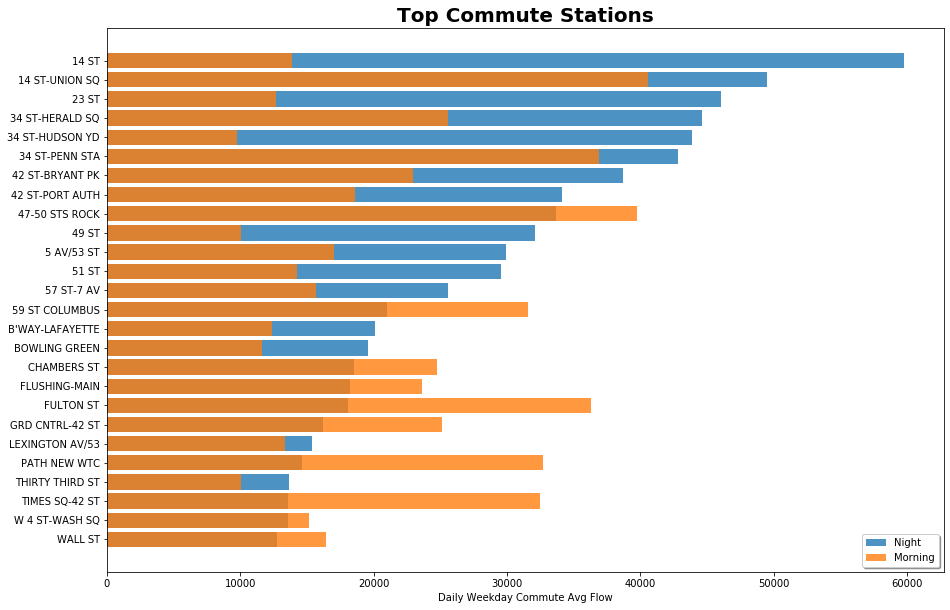

In [135]:
TOP_25_DF_weekend = DF_weekend.groupby(['STATION']).sum().sort_values('Total_flows', ascending=False).reset_index().iloc[0:26]


plt.figure(figsize = [15,10])

plt.barh(DF_STATION_night.STATION.unique(),DF_STATION_night_flows,alpha=0.8 ); #horizontal bar chart
plt.barh(DF_STATION_morning.STATION.unique(),DF_STATION_morning_flows ,alpha=0.8);


plt.gca().invert_yaxis()
plt.title("Top Commute Stations",fontsize = 20, weight = 'bold',color='k')
plt.xlabel('Daily Weekday Commute Avg Flow',fontsize = 10 ,color='k')
plt.legend(['Night','Morning'],shadow = True, loc = 0);

plt.savefig("Top Commute Stations" )


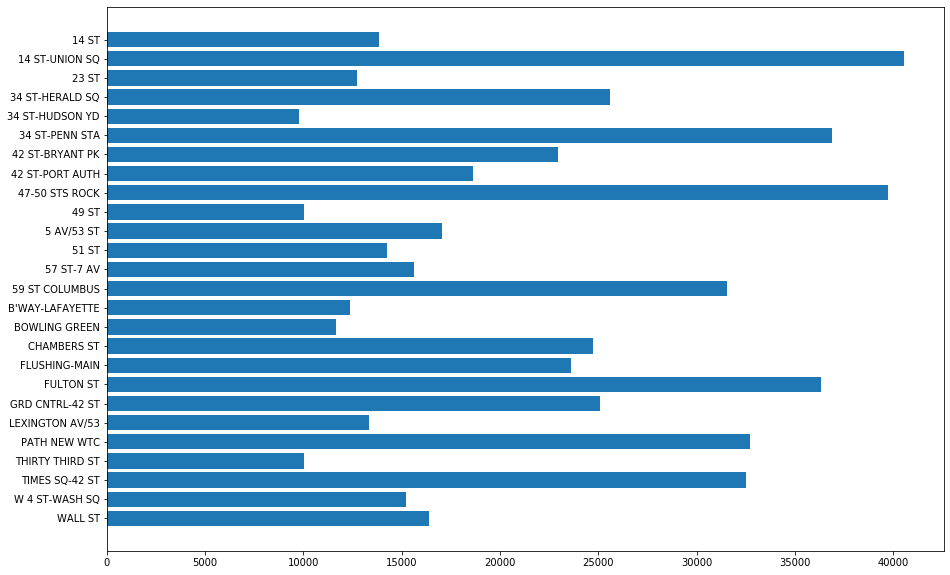

In [120]:
plt.figure(figsize = [15,10])

plt.barh(DF_STATION_morning.STATION.unique(),DF_STATION_morning_flows );

plt.gca().invert_yaxis()